In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('train.csv')
df = df[df['Company'] == "Company_0"]

In [4]:
close = df['Close'].values.reshape(-1,1)

In [5]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
close_scaled=scaler.fit_transform(close)
close_scaled

array([[0.23270468],
       [0.23845842],
       [0.23174641],
       ...,
       [0.75649492],
       [0.73298665],
       [0.73956693]])

In [6]:
def create_seq(data,time_step=60):
    X=[]
    y=[]
    for i in range(len(data)-time_step):
        X.append(data[i:(i+time_step)])
        y.append(data[i+time_step])
    return X,y

In [7]:
time_step=60
X,y=create_seq(close_scaled, time_step)

In [8]:
X=np.array(X)
X=X.reshape(X.shape[0],X.shape[1],1)
y=np.array(y)

In [9]:
X.shape

(1176, 60, 1)

In [10]:
y.shape

(1176, 1)

In [11]:
X_train, y_train = X,y

In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Bidirectional
from tensorflow import keras

model = Sequential()
model.add(Bidirectional(LSTM(128, return_sequences=True), input_shape=X_train[0].shape))
model.add(Bidirectional(LSTM(64, return_sequences=True)))
model.add(Bidirectional(LSTM(32)))
model.add(Dense(16, activation='relu'))
model.add(Dense(1))

# Compile the model
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001),
              loss="mean_squared_error",
              metrics=[keras.metrics.MeanSquaredError()])

# Display the model summary
model.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional (Bidirection  (None, 60, 256)           133120    
 al)                                                             
                                                                 
 bidirectional_1 (Bidirecti  (None, 60, 128)           164352    
 onal)                                                           
                                                                 
 bidirectional_2 (Bidirecti  (None, 64)                41216     
 onal)                                                           
                                                                 
 dense (Dense)               (None, 16)                1040      
                                                                 
 dense_1 (Dense)             (None, 1)                 17        
                                                      

In [13]:
model.fit(X_train,y_train,epochs=2)

Epoch 1/2

37/37 [==============================] - 12s 73ms/step - loss: 0.0141 - mean_squared_error: 0.0141
Epoch 2/2
37/37 [==============================] - 2s 65ms/step - loss: 0.0022 - mean_squared_error: 0.0022


In [14]:
preds = X_train[-1].squeeze()

In [15]:

for i in range(96):
    x = preds[i:i+60].reshape(60,1)
    x = np.expand_dims(x, 0)
    preds = np.append(preds, model.predict(x))

preds

1/1 [==============================] - 0s 24ms/step


array([0.8388271 , 0.85586473, 0.83388163, 0.81375553, 0.82711928,
       0.83899777, 0.83278449, 0.83964447, 0.8250737 , 0.79331037,
       0.80131904, 0.80982128, 0.8298041 , 0.80140412, 0.76433877,
       0.78057983, 0.80830442, 0.80669684, 0.80386641, 0.83040136,
       0.80997686, 0.8217295 , 0.81713137, 0.84012877, 0.82582112,
       0.83467007, 0.84448467, 0.81720711, 0.81416991, 0.8366099 ,
       0.81418203, 0.81883029, 0.82486615, 0.83199224, 0.82485605,
       0.81983661, 0.8092236 , 0.79280814, 0.80775692, 0.78738379,
       0.80818195, 0.79461569, 0.79024014, 0.79068697, 0.78782302,
       0.79056361, 0.80248816, 0.78594792, 0.81617617, 0.76274676,
       0.73166643, 0.75135974, 0.7594784 , 0.74805825, 0.79548549,
       0.80166848, 0.76914291, 0.77026662, 0.75649492, 0.73298665,
       0.73394179, 0.7314744 , 0.72882795, 0.72605604, 0.7231617 ,
       0.72017092, 0.71714491, 0.71413255, 0.71117973, 0.708327  ,
       0.70556313, 0.70287883, 0.70030254, 0.69788396, 0.69564

In [20]:
final_output = preds[60:]
final_output = scaler.inverse_transform(final_output.reshape(-1,1)).squeeze()
final_output

array([265.88205917, 265.37027039, 264.82134242, 264.24638984,
       263.64604315, 263.02569273, 262.39803564, 261.77320974,
       261.16073471, 260.56901756, 259.99573401, 259.43895539,
       258.90457897, 258.40291568, 257.93797122, 257.49694964,
       257.07073922, 256.66387728, 256.279059  , 255.91222923,
       255.56581118, 255.23884051, 254.9271508 , 254.62891231,
       254.34593005, 254.07894583, 253.82604335, 253.59169809,
       253.3731036 , 253.16253285, 252.96264395, 252.77322671,
       252.58966965, 252.41324618, 252.24777655, 252.09575812,
       251.95751234, 251.83230979, 251.71525461, 251.60566683,
       251.50250793, 251.40503613, 251.31593424, 251.2315922 ,
       251.15084787, 251.07324379, 250.99869344, 250.93187012,
       250.87503629, 250.83401505, 250.81186012, 250.78880268,
       250.75510048, 250.71244729, 250.65641708, 250.58951957,
       250.52872951, 250.4766679 , 250.4297123 , 250.39100299,
       250.35646009, 250.32089104, 250.28516127, 250.24

In [57]:
company_0 = pd.DataFrame(columns = [['Id', 'Close']])

In [58]:
test = pd.read_csv('test.csv')
test = test[test['Company'] == "Company_0"]

In [59]:
test = test.reset_index()

In [60]:
company_0['Id'] = test['Id']

In [61]:
company_0['Close'] = pd.Series(final_output)

In [62]:
company_0

,Id,Close
0,0,265.882059
1,6,265.370270
2,12,264.821342
3,18,264.246390
4,24,263.646043
...,...,...
91,546,249.437241
92,552,249.415692
93,558,249.394686
94,564,249.374275


In [63]:
company_0.to_csv('c_0.csv')

In [70]:
inverted_y_train = scaler.inverse_transform(y_train)

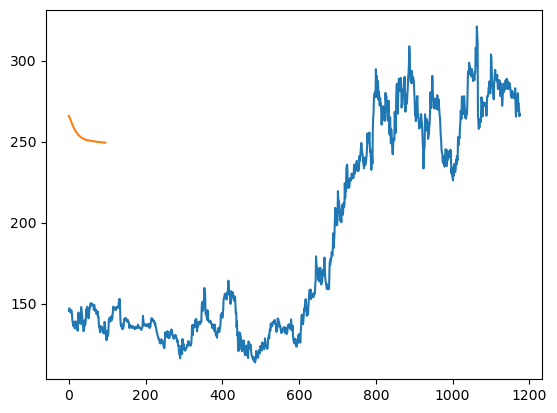

In [71]:
import matplotlib.pyplot as plt
plt.plot(inverted_y_train)
plt.plot(final_output)